In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
df = pd.read_csv("cps_85_wages.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EDUCATION   534 non-null    int64  
 1   SOUTH       534 non-null    object 
 2   SEX         534 non-null    object 
 3   EXPERIENCE  534 non-null    int64  
 4   UNION       534 non-null    object 
 5   WAGE        534 non-null    float64
 6   AGE         534 non-null    int64  
 7   RACE        534 non-null    object 
 8   OCCUPATION  534 non-null    object 
 9   SECTOR      534 non-null    object 
 10  MARR        534 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 46.0+ KB


In [7]:
df.describe()

,EDUCATION,EXPERIENCE,WAGE,AGE
count,534.000000,534.000000,534.000000,534.000000
mean,13.018727,17.822097,9.024064,36.833333
std,2.615373,12.379710,5.139097,11.726573
min,2.000000,0.000000,1.000000,18.000000
25%,12.000000,8.000000,5.250000,28.000000
50%,12.000000,15.000000,7.780000,35.000000
75%,15.000000,26.000000,11.250000,44.000000
max,18.000000,55.000000,44.500000,64.000000


<AxesSubplot: xlabel='AGE', ylabel='WAGE'>

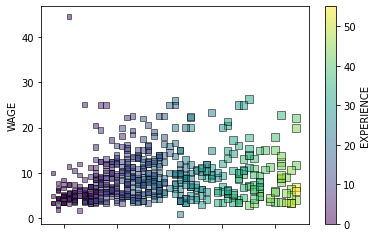

In [8]:
df.plot(kind = 'scatter', x='AGE' ,y = 'WAGE', alpha = 0.5, cmap = 'viridis',c='EXPERIENCE', marker = 's', s='AGE', edgecolor= 'black')

<AxesSubplot: xlabel='AGE', ylabel='EXPERIENCE'>

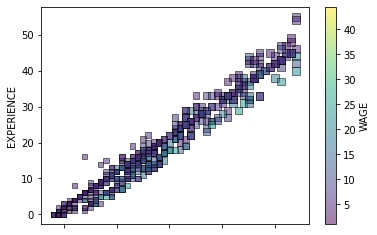

In [9]:
df.plot(kind = 'scatter', x='AGE' ,y = 'EXPERIENCE', alpha = 0.5, cmap = 'viridis',c='WAGE', marker = 's', s='AGE', edgecolor= 'black')

In [11]:
df.pivot_table(values='AGE',index='SECTOR',aggfunc=['mean','max','median'])

,mean,max,median
,AGE,AGE,AGE
SECTOR,,,
Construction,40.083333,61,42.5
Manufacturing,37.838384,64,35.0
Other,36.401460,64,35.0


In [12]:
df.pivot_table(values='AGE',index='SECTOR',columns='SEX')

SEX,female,male
SECTOR,,
Construction,57.500000,38.500000
Manufacturing,38.666667,37.300000
Other,37.490196,35.328502


<AxesSubplot: xlabel='SECTOR'>

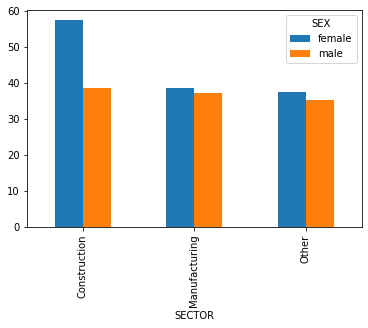

In [13]:
df.pivot_table(values='AGE',index='SECTOR',columns='SEX').plot(kind='bar')

<AxesSubplot: xlabel='SECTOR'>

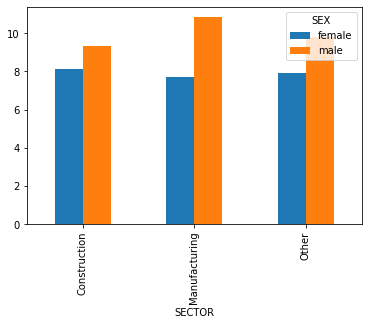

In [14]:
df.pivot_table(values='WAGE',index='SECTOR',columns='SEX').plot(kind='bar')

In [15]:
df

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,no,female,21,not_member,5.10,35,Hispanic,Other,Manufacturing,Married
1,9,no,female,42,not_member,4.95,57,White,Other,Manufacturing,Married
2,12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried
3,12,no,male,4,not_member,4.00,22,White,Other,Other,Unmarried
4,12,no,male,17,not_member,7.50,35,White,Other,Other,Married
...,...,...,...,...,...,...,...,...,...,...,...
529,18,no,male,5,not_member,11.36,29,White,Professional,Other,Unmarried
530,12,no,female,33,not_member,6.10,51,Other,Professional,Other,Married
531,17,no,female,25,member,23.25,48,Other,Professional,Other,Married
532,12,yes,male,13,member,19.88,31,White,Professional,Other,Married


# filtering data using boolean filteing

In [18]:
df['SECTOR']=='manufacturing' # this is boolean filter

0      False
1      False
2      False
3      False
4      False
       ...  
529    False
530    False
531    False
532    False
533    False
Name: SECTOR, Length: 534, dtype: bool

In [19]:
df[df['SECTOR']=='manufacturing'] # boolean filtering

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR


In [20]:
df[~(df['SECTOR']=='manufacturing')] # inverted boolean filtering

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,no,female,21,not_member,5.10,35,Hispanic,Other,Manufacturing,Married
1,9,no,female,42,not_member,4.95,57,White,Other,Manufacturing,Married
2,12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried
3,12,no,male,4,not_member,4.00,22,White,Other,Other,Unmarried
4,12,no,male,17,not_member,7.50,35,White,Other,Other,Married
...,...,...,...,...,...,...,...,...,...,...,...
529,18,no,male,5,not_member,11.36,29,White,Professional,Other,Unmarried
530,12,no,female,33,not_member,6.10,51,Other,Professional,Other,Married
531,17,no,female,25,member,23.25,48,Other,Professional,Other,Married
532,12,yes,male,13,member,19.88,31,White,Professional,Other,Married


In [21]:
explt10=df['EXPERIENCE']<=10 # BOOLEAN FILTER
df[explt10]

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
2,12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried
3,12,no,male,4,not_member,4.00,22,White,Other,Other,Unmarried
5,13,no,male,9,member,13.07,28,White,Other,Other,Unmarried
7,12,no,male,9,not_member,19.47,27,White,Other,Other,Unmarried
9,12,no,male,9,not_member,8.75,27,White,Other,Other,Unmarried
...,...,...,...,...,...,...,...,...,...,...,...
522,16,no,male,10,member,7.50,32,White,Professional,Other,Married
523,17,yes,male,2,not_member,7.00,25,White,Professional,Other,Married
526,15,no,male,10,not_member,12.50,31,White,Professional,Other,Unmarried
528,16,no,female,6,member,11.79,28,White,Professional,Other,Unmarried


<AxesSubplot: >

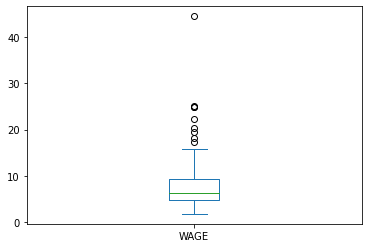

In [22]:
df[explt10].plot(kind='box',x='EXPERIENCE',y='WAGE')

# Sorting

In [23]:
df

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,no,female,21,not_member,5.10,35,Hispanic,Other,Manufacturing,Married
1,9,no,female,42,not_member,4.95,57,White,Other,Manufacturing,Married
2,12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried
3,12,no,male,4,not_member,4.00,22,White,Other,Other,Unmarried
4,12,no,male,17,not_member,7.50,35,White,Other,Other,Married
...,...,...,...,...,...,...,...,...,...,...,...
529,18,no,male,5,not_member,11.36,29,White,Professional,Other,Unmarried
530,12,no,female,33,not_member,6.10,51,Other,Professional,Other,Married
531,17,no,female,25,member,23.25,48,Other,Professional,Other,Married
532,12,yes,male,13,member,19.88,31,White,Professional,Other,Married


In [26]:
df.sort_values(by='AGE', inplace=True)

In [29]:
df.sort_values(by=['RACE','WAGE'],ascending=[False,True],inplace =True) # both false means both in descending

# Group by

In [30]:
df.groupby('OCCUPATION')['EXPERIENCE'].mean()

OCCUPATION
Clerical        17.577320
Management      18.072727
Other           18.064103
Professional    15.457143
Sales           18.447368
Service         20.192771
Name: EXPERIENCE, dtype: float64

In [32]:
df.groupby('OCCUPATION')['EXPERIENCE'].agg(['mean','min','max','median','std'])

,mean,min,max,median,std
OCCUPATION,,,,,
Clerical,17.577320,0,45,15.0,12.124214
Management,18.072727,1,42,15.0,11.375501
Other,18.064103,0,55,15.0,12.448438
Professional,15.457143,0,42,13.0,10.275090
Sales,18.447368,0,45,15.5,13.492135
Service,20.192771,0,54,17.0,14.718876


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11480\2347050217.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('OCCUPATION')['EXPERIENCE','WAGE'].mean().plot(kind='box')


<AxesSubplot: >

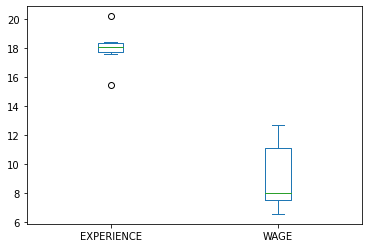

In [33]:
df.groupby('OCCUPATION')['EXPERIENCE','WAGE'].mean().plot(kind='box')